# **[W1] TASK**

- 작업 챕터: 03-2장. 선형 회귀

- 주요 질문:  
    1. K-NN 모델의 경우 학습한 모델의 최소/최대 값을 넘어서는 미지의 값을 예측하지 않는가
    
    2. 선형 회귀 모델이 K-NN 모델에 비해서 외삽에 유리한 이유는 무엇인가?

In [27]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


## **1. 선형 회귀**

In [7]:
# 농어의 길이 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
# 농어의 무게 데이터 (타겟: 종속 변수)
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
# 데이터 분할 및 전처리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [9]:
# 모델 학습
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1010.]


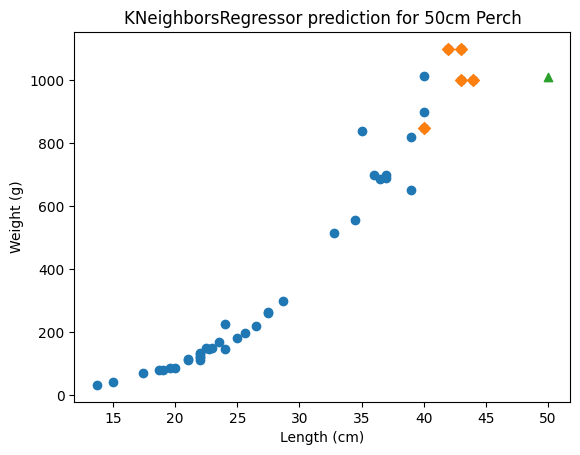

In [10]:
# 산포도 확인
distances, indexes = knr.kneighbors([[50]]) # 길이가 50cm인 농어에 대한 가장 가까운 이웃 5개(기본값)의 거리와 인덱스 추출

plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50cm 농어의 이웃들을 다이아몬드 마커로 표시
plt.scatter(50, 1010, marker='^') # 50cm 농어의 예측값(1010g)을 삼각형 마커로 표시 (knr.predict([[50]]) 결과 사용)

plt.xlabel('Length (cm)') # x축 레이블
plt.ylabel('Weight (g)') # y축 레이블
plt.title('KNeighborsRegressor prediction for 50cm Perch') # 그래프 제목 추가

plt.show()

Length 50: [1010.]
Length 100: [1010.]


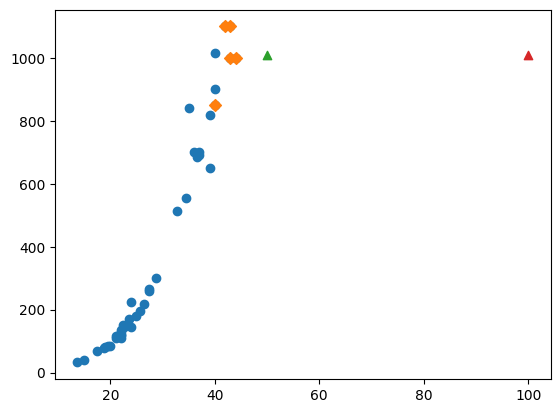

In [11]:
# 예측 값의 한계 (K-NN 회귀의 문제점 시각화)
plt.scatter(train_input, train_target) # 훈련 세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50cm 농어의 이웃들을 다이아몬드 마커로 표시
plt.scatter(50, 1010, marker='^') # 50cm 농어 예측값을 삼각형 마커로 표시
plt.scatter(100, 1010, marker='^') # 100cm 농어 예측값을 삼각형 마커로 표시

print(f"Length 50: {knr.predict([[50]])}") # 길이가 50cm인 농어의 예측 무게
print(f"Length 100: {knr.predict([[100]])}") # 길이가 100cm인 농어의 예측 무게

# K-NN 회귀의 한계: 예측 범위 밖의 값에 대해서는 훈련 데이터의 최댓값을 벗어나지 못하고,
# 단순히 가장 가까운 이웃들의 평균을 반환하므로 새로운 패턴을 학습하지 못함.
# 특히 훈련 데이터의 범위를 벗어나는 새로운 입력에 대해서는 항상 가장 먼 훈련 데이터의 이웃 평균을 예측값으로 내놓는 문제점.
# 여기서는 50cm와 100cm 모두 훈련 데이터의 가장 큰 길이(44cm) 주변 이웃의 평균값인 1010g을 예측하고 있음을 보여줌.

In [12]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


In [13]:
# 학습한 절편과 계수
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


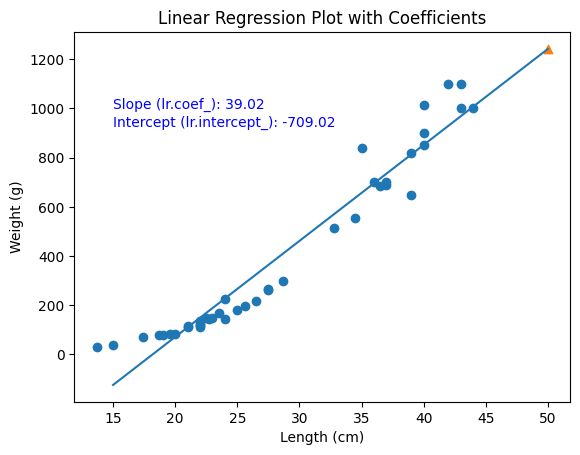

train R^2: 0.939846333997604
test R^2: 0.8247503123313558


In [14]:
# 시각화
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Linear Regression Plot with Coefficients') # 그래프 제목 추가

# lr.coef_와 lr.intercept_ 값을 그래프에 표시
# f-string을 사용하여 소수점 아래 두 자리까지 표시
plt.text(15, 1000, f'Slope (lr.coef_): {lr.coef_[0]:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Intercept (lr.intercept_): {lr.intercept_:.2f}', fontsize=10, color='blue')

plt.show()

print(f"train R^2: {lr.score(train_input, train_target)}")
print(f"test R^2: {lr.score(test_input, test_target)}")

In [15]:
# 다항 회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr.fit(train_poly, train_target)

# 예측 입력도 훈련 데이터와 동일한 2차 다항 특성 형태로 변환해야 함
print(lr.predict([[50**2, 50]]))
print(lr.predict([[100**2, 100]]))

[1573.98423528]
[8103.57880667]


In [16]:
# 학습한 절편과 계수
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


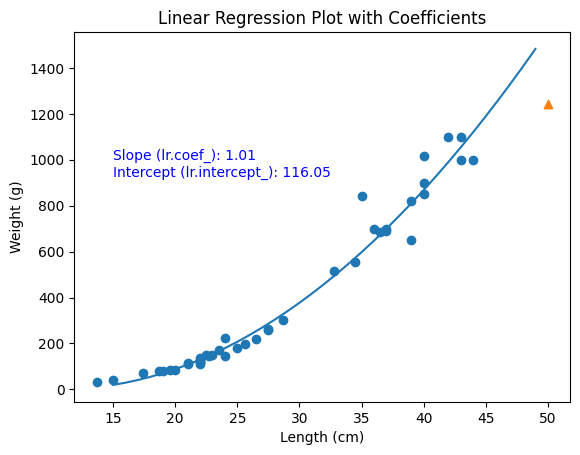

train R^2: 0.9706807451768623
test R^2: 0.9775935108325122


In [17]:
# 시각화
plt.scatter(train_input, train_target)

point = np.arange(15, 50)

plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1241.8, marker='^')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Linear Regression Plot with Coefficients') # 그래프 제목 추가

# lr.coef_와 lr.intercept_ 값을 그래프에 표시
plt.text(15, 1000, f'Slope (lr.coef_): {lr.coef_[0]:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Intercept (lr.intercept_): {lr.intercept_:.2f}', fontsize=10, color='blue')

plt.show()


print(f"train R^2: {lr.score(train_poly, train_target)}")
print(f"test R^2: {lr.score(test_poly, test_target)}")

## **2. 주요 질문에 대한 해답**

- 문제 제기: K-NN 모델은 새로운 데이터 포인트에 대해 학습한 모델을 넘어서는 값을 제대로 추정하지 못하는가

- 주요 질문:  
    1. K-NN 모델의 경우 학습한 모델의 최소/최대 값을 넘어서는 미지의 값을 예측하지 않는가

    2. 선형 회귀 모델이 K-NN 모델에 비해서 외삽에 유리한 이유는 무엇인가?

- 해답:
    1. K-NN 모델은 훈련 과정에서 별도의 모델 함수를 학습하지 않음. 예측 시 새로운 입력값과의 거리를 계산하여 가장 가까운 이웃을 찾고, **이웃들의 타겟 값 평균을 산출하여 예측값으로 사용**
    
        → 즉, 해당 모델은 훈련 데이터 범위를 벗어나는 새로운 입력 값에 대해 외삽이 불가능함.  


    2. 선형 회귀 모델은 훈련 데이터를 통해 독립 변수와 종속 변수 사이의 선형 관계를 나타내는 수학적 방정식을 학습함
    
        → 새로운 입력 값이 주어진 경우 **방정식에 대입하여 값을 계산하기에 범위에 한정되지 않고 이론적으로 무한히 확장될 수 있음**

- 한계점:
    1. 가정의 한계: 선형 회귀 모델의 예측은 훈련 데이터에서 관찰된 패턴이 범위 밖에서도 동일하게 유지될 것이라는 가정에 기반함
    2. 비현실적 예측 가능성: 농어의 길이가 무한정 길어진다고 해서 무게가 선형적으로 증가하지 않음
    3. 불확실성: 훈련 데이터 범위에서 멀어질수록 예측값의 불확실성을 기하급수적으로 증가


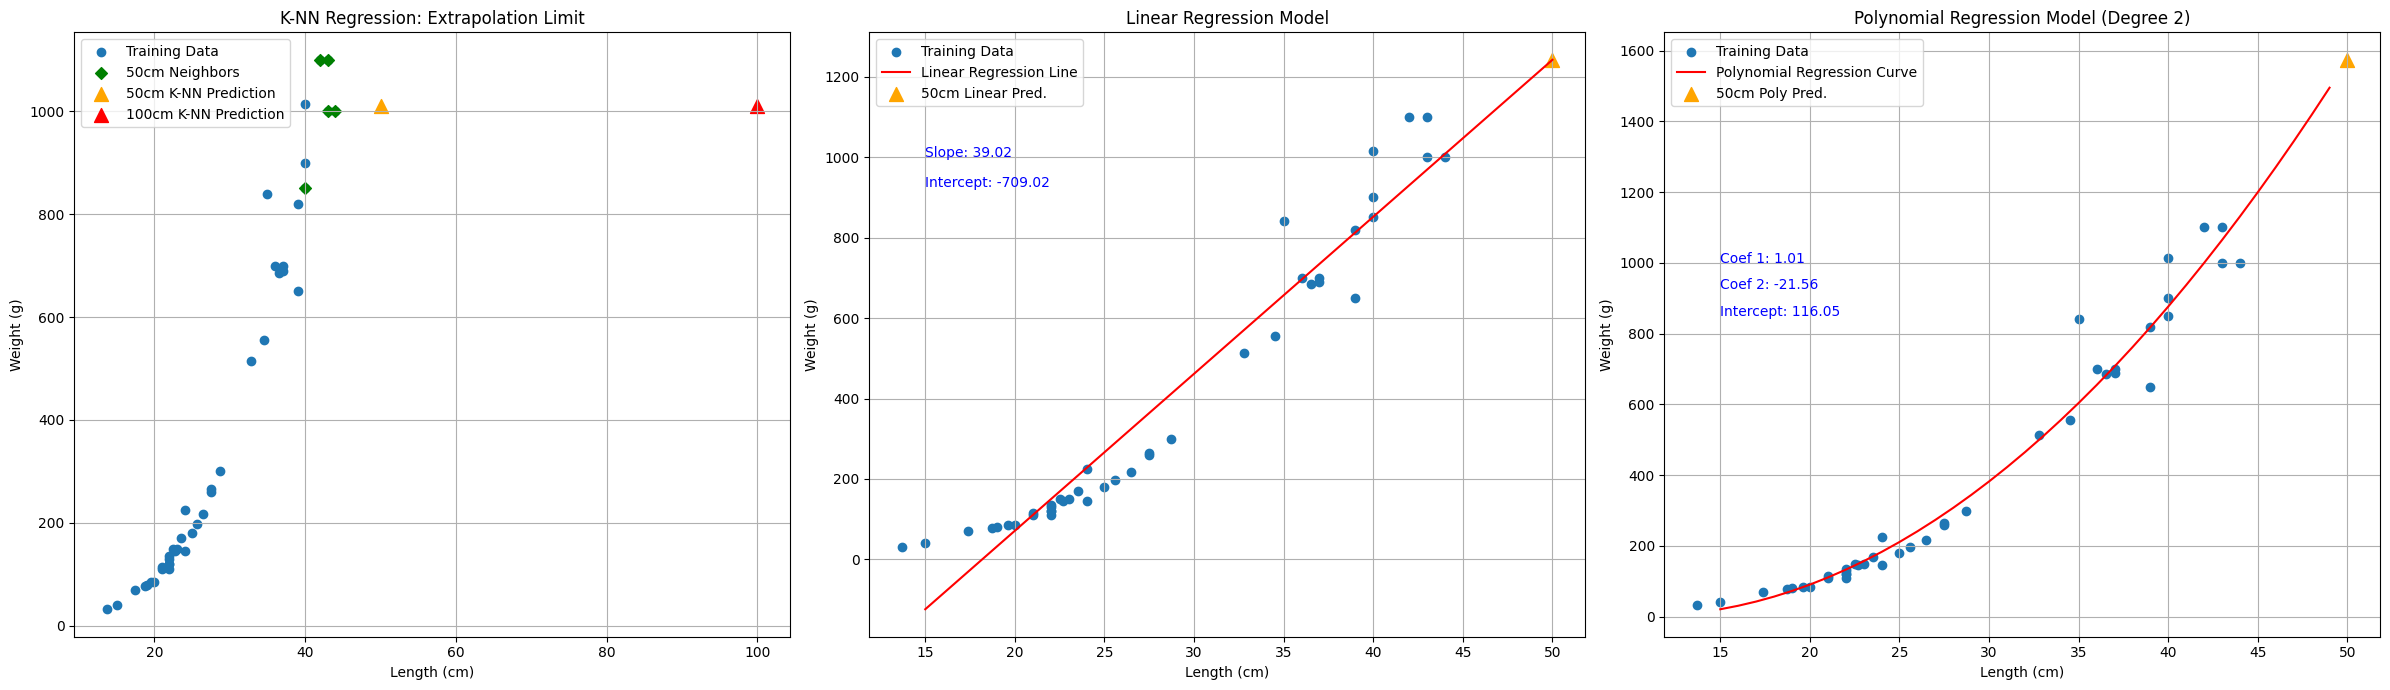

In [23]:
# --- K-NN Regression Model (re-initialize for self-containment) --- #
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
distances, indexes = knr.kneighbors([[50]]) # 50cm 농어의 이웃 찾기
knr_pred_50 = knr.predict([[50]])[0]
knr_pred_100 = knr.predict([[100]])[0]

# --- Linear Regression Model --- #
lr_linear = LinearRegression()
lr_linear.fit(train_input, train_target)
linear_coef = lr_linear.coef_[0]
linear_intercept = lr_linear.intercept_

# --- Polynomial Regression Model --- #
train_poly = np.column_stack((train_input ** 2, train_input))
lr_poly = LinearRegression()
lr_poly.fit(train_poly, train_target)
poly_coef = lr_poly.coef_
poly_intercept = lr_poly.intercept_

plt.figure(figsize=(24, 7)) # 전체 그림의 크기 설정 (가로를 더 넓게 조정)

# 첫 번째 서브플롯: K-NN 회귀 예측 값의 한계
plt.subplot(1, 3, 1) # 1행 3열 중 첫 번째
plt.scatter(train_input, train_target, label='Training Data') # 훈련 세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D', color='green', label='50cm Neighbors') # 50cm 농어의 이웃들을 다이아몬드 마커로 표시
plt.scatter(50, knr_pred_50, marker='^', color='orange', s=100, label='50cm K-NN Prediction') # 50cm 농어 예측값을 삼각형 마커로 표시
plt.scatter(100, knr_pred_100, marker='^', color='red', s=100, label='100cm K-NN Prediction') # 100cm 농어 예측값을 삼각형 마커로 표시
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('K-NN Regression: Extrapolation Limit')
plt.legend()
plt.grid(True)

# 두 번째 서브플롯: 선형 회귀
plt.subplot(1, 3, 2) # 1행 3열 중 두 번째
plt.scatter(train_input, train_target, label='Training Data')
plt.plot([15, 50], [15*linear_coef + linear_intercept, 50*linear_coef + linear_intercept], color='red', label='Linear Regression Line')
plt.scatter(50, lr_linear.predict([[50]])[0], marker='^', color='orange', s=100, label='50cm Linear Pred.') # 50cm 예측값 (선형 회귀 모델 사용)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Linear Regression Model')
plt.text(15, 1000, f'Slope: {linear_coef:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Intercept: {linear_intercept:.2f}', fontsize=10, color='blue')
plt.legend()
plt.grid(True)

# 세 번째 서브플롯: 다항 회귀
plt.subplot(1, 3, 3) # 1행 3열 중 세 번째
plt.scatter(train_input, train_target, label='Training Data')
point = np.arange(15, 50)
plt.plot(point, point**2 * poly_coef[0] + point * poly_coef[1] + poly_intercept, color='red', label='Polynomial Regression Curve')
plt.scatter(50, lr_poly.predict([[50**2, 50]])[0], marker='^', color='orange', s=100, label='50cm Poly Pred.') # 50cm 예측값 (다항 회귀 모델 사용)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Polynomial Regression Model (Degree 2)')
plt.text(15, 1000, f'Coef 1: {poly_coef[0]:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Coef 2: {poly_coef[1]:.2f}', fontsize=10, color='blue')
plt.text(15, 850, f'Intercept: {poly_intercept:.2f}', fontsize=10, color='blue')
plt.legend()
plt.grid(True)

plt.tight_layout() # 서브플롯 간의 간격을 자동으로 조정
plt.show()

# **3. 자유 추가 개념**

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# 1. 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

# 2. 데이터 분할 (기존 방식)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length.reshape(-1, 1), perch_weight, random_state=42)

### **3.1 표준화(StandardScaler)**

- 거리 기반 알고리즘은 특성 간 단위 차이에 매우 민감함. K-NN 또한 동일한 약점을 가짐. 교재에서는 직접 표준점수로 변환하여 진행함
- 해당 셀에서는 ```StandardScaler``` 메서드를 통해 스케일 변환을 시도함
- 동작 원리
    - ```fit()```: 데이터의 각 특성별로 평균과 표준편차를 계산
    - ```transform()```: 모든 데이터에서 ```fit()```에서 구한 평균을 빼고 표준편차로 나눔(표준화)
- 주의사항: 테스트 세트에는 ```fit()``` 미적용




In [32]:
# [추가 개념 1] 표준화 스케일링 (StandardScaler)
from sklearn.preprocessing import StandardScaler

train_poly = np.column_stack((train_input ** 2, train_input)) # 다항 특성 적용
test_poly = np.column_stack((test_input ** 2, test_input))

ss = StandardScaler() # 스케일러 객체

ss.fit(train_poly) # 훈련 데이터 기준 표준화 진행

train_scaled = ss.transform(train_poly) # 훈련 세트 변환
test_scaled = ss.transform(test_poly) # 테스트 세트 변환

print(f"train set scaler: {np.mean(train_scaled)}, \ntest set scaler: {np.mean(test_scaled)}")

train set scaler: -1.559599010782958e-16, 
test set scaler: -0.25314445899213567


### **3.2 K-fold**
- 보통 데이터 분할 시 ```random_state```를 지정하여 재현성을 보장함.
- 다만, 고정된 데이터만 사용한다면 모델이 특정 조합에 과적합 될 가능성이 있음.
- 이에 따라 교차 검증 방식 중 하나인 K-Fold를 적용하여 그 차이를 확인해 보고자 함.
- 동작 원리
    - 쪼개기: 전체 데이터를 똑같은 크기의 k개로 나눔
    - 순환 학습 및 검증: 지정한 k만큼 반복하여 학습과 테스트를 반복
    - 평균 산출: k번 시행한 결과를 평균내어 모델의 성능을 파악함.
- 활용처:
    - 데이터가 부족한 경우
    - 일반화 성능을 확인하고자 하는 경우
    - 하이퍼파라미터 튜닝 기준을 확인하고자 하는 경우
- 주의 사항: k가 증가하면 모델 학습 시간도 증가



In [34]:
# [추가 개념 2] K-Fold 교차 검증 (Cross Validation)
from sklearn.model_selection import cross_validate

knr = KNeighborsRegressor(n_neighbors=3) # 이웃 수 설정

scores = cross_validate(knr, train_scaled, train_target, return_train_score=True, cv=5) # 교차 검증(cv): 5회

print("각 폴드별 점수:", cv_results['test_score'])
print("평균 점수:", np.mean(cv_results['test_score']))
print(f"교차 검증 평균 점수: {np.mean(scores['test_score']):.4f}")

각 폴드별 점수: [0.99164791 0.99333481 0.9649829  0.86152747 0.97365367]
평균 점수: 0.9570293496045691
교차 검증 평균 점수: 0.9508


In [50]:
from sklearn.model_selection import cross_val_score

n_neighbors_list = [1, 3, 5, 7, 9, 11]
cv_scores = []

for n in n_neighbors_list:
    knr = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knr, train_scaled, train_target, cv=5)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)
    print(f"n_neighbors = {n}, CV Mean Score = {mean_score:.4f}")

# 가장 점수 높은 n 찾기
best_idx = np.argmax(cv_scores) # cv_scores 중 가장 큰 값의 '위치(인덱스)' 반환
best_n = n_neighbors_list[best_idx] # 그 위치에 대응하는 n_neighbors 값 추출

print(f"\n >>> 최적의 이웃 수: {best_n} (Max Score: {cv_scores[best_idx]:.4f})")

best_n = n_neighbors_list[np.argmax(cv_scores)]

n_neighbors = 1, CV Mean Score = 0.9309
n_neighbors = 3, CV Mean Score = 0.9508
n_neighbors = 5, CV Mean Score = 0.9516
n_neighbors = 7, CV Mean Score = 0.9489
n_neighbors = 9, CV Mean Score = 0.9350
n_neighbors = 11, CV Mean Score = 0.9175

 >>> 최적의 이웃 수: 5 (Max Score: 0.9516)
 최적의 이웃 수: 5


### **3.3 평가 지표(MAE, RMSE)**
- MAE(평균 절대 오차): 실제 값과 예측 값 사이의 거리(오차)에 절댓값을 씌워 평균낸 지표(오차의 크기만큼)

- RMAE(평균 제곱근 오차): 오차를 제곱하여 평균낸 후(MAE), 루트를 씌운 값(큰 오차가 있는 경우 민감하게 반응)

- MAE는 데이터 내 오차가 어느 정도인지를 파악한다면 RMAE는 데이터 내 이상값이 있는지 파악이 용이함

In [37]:
# [추가 개념 3] 상세 평가 지표 (MAE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr.fit(train_scaled, train_target)

test_pred = lr.predict(test_scaled)

mae = mean_absolute_error(test_target, test_pred)
rmse = np.sqrt(mean_squared_error(test_target, test_pred))

print(f"MAE (평균 절대 오차): {mae:.2f}g")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}g")

MAE (평균 절대 오차): 37.77g
RMSE (평균 제곱근 오차): 47.42g


## **4. 검증**


--- [외삽 예측] ---
50cm 농어의 예측 무게: 1573.98g


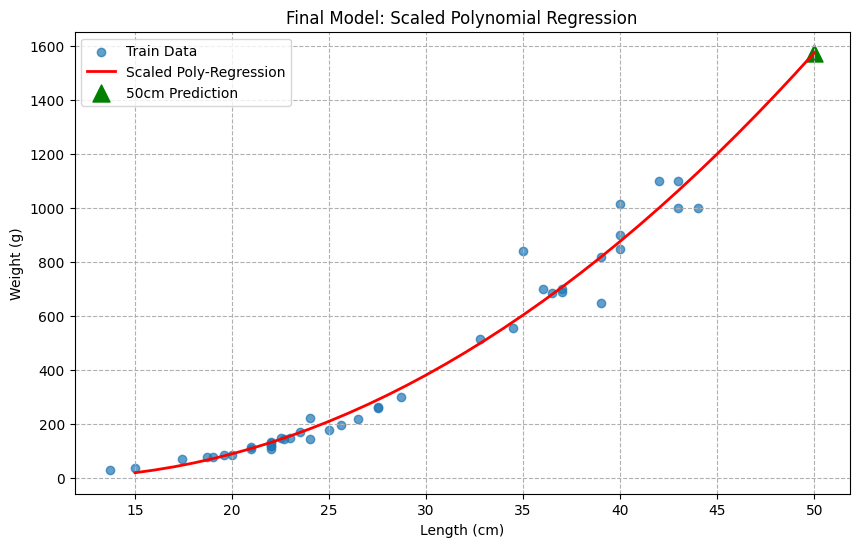

In [38]:
# 외삽(Extrapolation) 테스트: 50cm 거대 농어 예측
new_fish = np.array([[50**2, 50]])
new_fish_scaled = ss.transform(new_fish)
pred_50 = lr.predict(new_fish_scaled)

print(f"\n--- [외삽 예측] ---")
print(f"50cm 농어의 예측 무게: {pred_50[0]:.2f}g")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(train_input, train_target, label='Train Data', alpha=0.7)

# 예측 곡선 그리기용 데이터
point = np.arange(15, 51).reshape(-1, 1)
point_poly = np.column_stack((point**2, point))
point_scaled = ss.transform(point_poly)
plt.plot(point, lr.predict(point_scaled), color='red', lw=2, label='Scaled Poly-Regression')

# 50cm 예측 지점 표시
plt.scatter(50, pred_50, marker='^', s=150, color='green', label='50cm Prediction')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Final Model: Scaled Polynomial Regression')

plt.legend()
plt.grid(True, linestyle='--')

plt.show()

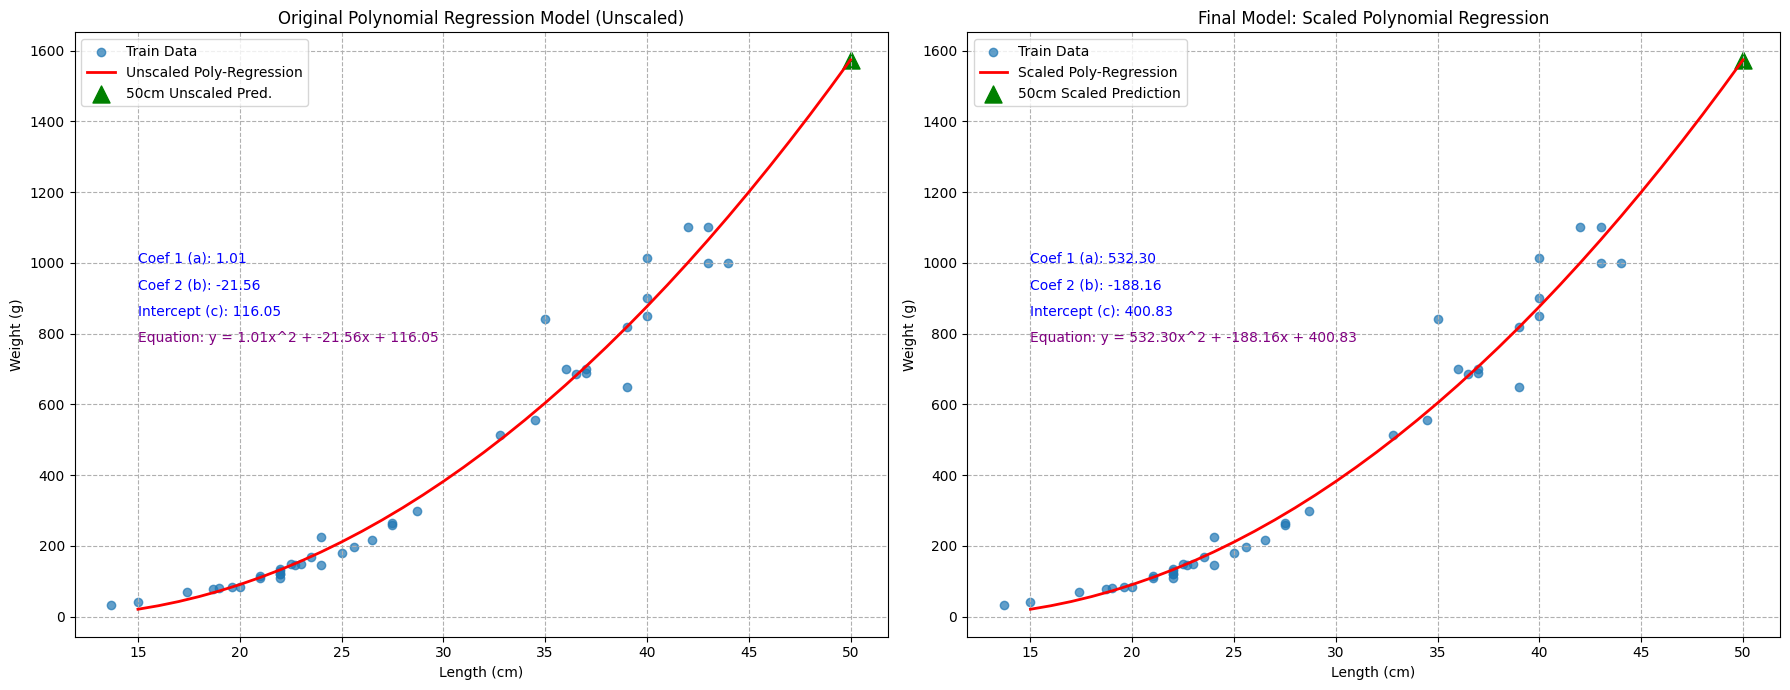

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- 1. 원본 다항 회귀 모델 (스케일링 미적용) --- #
# 비교를 위해 스케일링되지 않은 다항 특성(길이의 제곱, 길이)을 생성하고 모델을 학습시킴
train_poly_unscaled = np.column_stack((train_input ** 2, train_input))
lr_poly_unscaled = LinearRegression()
lr_poly_unscaled.fit(train_poly_unscaled, train_target)

# 학습된 모델의 계수(기울기)와 절편 저장
poly_unscaled_coef = lr_poly_unscaled.coef_
poly_unscaled_intercept = lr_poly_unscaled.intercept_

# --- 2. 최종 스케일링된 다항 회귀 모델 시각화 --- #

plt.figure(figsize=(18, 7)) # 전체 그래프 크기 설정 (가로로 길게 배치)

# --- 첫 번째 서브플롯: 원본 다항 회귀 모델 (Unscaled) --- #
plt.subplot(1, 2, 1)
plt.scatter(train_input, train_target, label='Train Data', alpha=0.7) # 훈련 데이터 산점도

# 예측 곡선을 그리기 위한 데이터 생성 (15cm ~ 50cm 범위)
point_unscaled = np.arange(15, 51).reshape(-1, 1)
point_poly_unscaled = np.column_stack((point_unscaled**2, point_unscaled))
# 학습된 계수와 절편을 사용하여 예측 곡선(빨간선)을 그림
plt.plot(point_unscaled, point_poly_unscaled[:, 0] * poly_unscaled_coef[0] +
          point_poly_unscaled[:, 1] * poly_unscaled_coef[1] + poly_unscaled_intercept,
          color='red', lw=2, label='Unscaled Poly-Regression')

# 외삽 테스트: 50cm 농어의 예측 지점 표시
pred_50_unscaled = lr_poly_unscaled.predict([[50**2, 50]])[0]
plt.scatter(50, pred_50_unscaled, marker='^', s=150, color='green', label='50cm Unscaled Pred.')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Original Polynomial Regression Model (Unscaled)')

# 그래프 내부에 계수 및 방정식 텍스트 표시
plt.text(15, 1000, f'Coef 1 (a): {poly_unscaled_coef[0]:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Coef 2 (b): {poly_unscaled_coef[1]:.2f}', fontsize=10, color='blue')
plt.text(15, 850, f'Intercept (c): {poly_unscaled_intercept:.2f}', fontsize=10, color='blue')
plt.text(15, 775, f'Equation: y = {poly_unscaled_coef[0]:.2f}x^2 + {poly_unscaled_coef[1]:.2f}x + {poly_unscaled_intercept:.2f}', fontsize=10, color='purple')
plt.legend()
plt.grid(True, linestyle='--')

# --- 두 번째 서브플롯: 최종 모델: 스케일링된 다항 회귀 (Scaled) --- #
plt.subplot(1, 2, 2)
plt.scatter(train_input, train_target, label='Train Data', alpha=0.7)

# 예측 곡선 데이터 준비
point_scaled = np.arange(15, 51).reshape(-1, 1)
point_poly_scaled = np.column_stack((point_scaled**2, point_scaled))

# 스케일러와 모델 재정의 (범위 확인용)
ss_for_plot = StandardScaler()
# 훈련 데이터의 다항 특성으로 스케일러 학습
ss_for_plot.fit(np.column_stack((train_input ** 2, train_input)))
lr_for_plot = LinearRegression()
# 스케일링된 데이터를 사용하여 모델 학습
lr_for_plot.fit(ss_for_plot.transform(np.column_stack((train_input ** 2, train_input))), train_target)

# 예측할 데이터(곡선용)도 반드시 훈련 데이터 기준 스케일러로 변환해야 함
point_scaled_transformed = ss_for_plot.transform(point_poly_scaled)
plt.plot(point_scaled, lr_for_plot.predict(point_scaled_transformed), color='red', lw=2, label='Scaled Poly-Regression')

# 외삽 테스트: 50cm 농어도 스케일링 후 예측 수행
new_fish_scaled_for_plot = ss_for_plot.transform(np.array([[50**2, 50]]))
pred_50_scaled_for_plot = lr_for_plot.predict(new_fish_scaled_for_plot)[0]
plt.scatter(50, pred_50_scaled_for_plot, marker='^', s=150, color='green', label='50cm Scaled Prediction')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Final Model: Scaled Polynomial Regression')

# 스케일링된 모델의 계수 및 방정식 표시 (Unscaled 모델과 수치가 다름을 확인 가능)
plt.text(15, 1000, f'Coef 1 (a): {lr_for_plot.coef_[0]:.2f}', fontsize=10, color='blue')
plt.text(15, 925, f'Coef 2 (b): {lr_for_plot.coef_[1]:.2f}', fontsize=10, color='blue')
plt.text(15, 850, f'Intercept (c): {lr_for_plot.intercept_:.2f}', fontsize=10, color='blue')
plt.text(15, 775, f'Equation: y = {lr_for_plot.coef_[0]:.2f}x^2 + {lr_for_plot.coef_[1]:.2f}x + {lr_for_plot.intercept_:.2f}', fontsize=10, color='purple')
plt.legend()
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()

1. 교차 검증 (K-Fold): 평균 R2: 0.9570
- 특정 분할에 의존하지 않는 모델의 일반화 성능 확인 (4번 폴드 0.86 제외 시 매우 안정적)

2. 평균 절대 오차 (MAE): 37.77g
- 모델이 농어 무게를 예측할 때 평균적으로 발생하는 실제 오차 범위

3. 평균 제곱근 오차 (RMSE):47.42g
- MAE보다 높음 → 특정 샘플(튀는 농어)에서 상대적으로 큰 오차가 발생하고 있음

4. 외삽 (50cm 농어):약 1,573.98g
- 위 과정을 거쳐 다항 회귀 모델의 회귀 예측 값을 확인